# Lab 06 Data visualization with matplotlib and seaborn

Nice visualization libraries:
- matplotlib: https://matplotlib.org/stable/index.html
- seaborn: http://seaborn.pydata.org/
- bokeh: http://bokeh.pydata.org/en/latest/
- folium (geospatial visualization): https://python-visualization.github.io/folium/

## Please submit your finished lab06 jupyter notebook via pull request in GitHub

In [2]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

## load the data sets

In [3]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [4]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [5]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


## First up: Bar Charts

<function matplotlib.pyplot.show(close=None, block=None)>

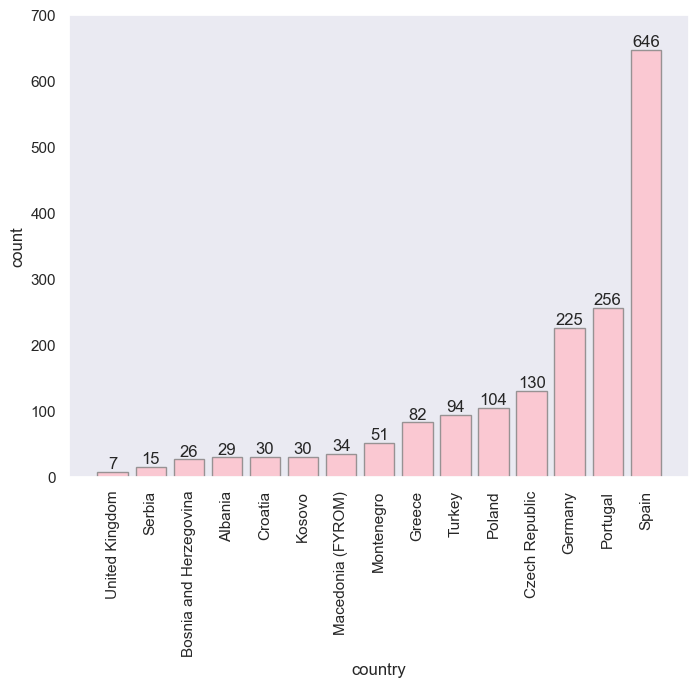

In [58]:
# Q1: Can you draw a bar chart for the most visited countries by using matplotlib and seaborn? You can use the df dataframe.
# Please style the chart to make it look nicer
# such as figsize, width, alpha, color, edgecolor, grid, xlim, and ylim
import seaborn as sns
sns.set(color_codes=True)
sns.set()

most_cou = df.groupby(df['country'])[['country']].count()
most_cou.columns=["count"] 
most_cou.reset_index(inplace=True)#add index
most_cou = most_cou.sort_values(by='count', ascending=True)
#print(most_cou)

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(most_cou['country'],most_cou['count'],color='pink',edgecolor='grey',alpha=0.8)
       
plt.xticks(rotation=90)
ax.set_xlabel('country')
ax.set_ylabel('count')
ax.grid(False)
ax.set_ylim(0, 700)

for i, v in enumerate(most_cou['count']):
    ax.text(i, v+1, str(v), ha='center', va='bottom')

plt.show

Now you try: re-create the plot above, but make the bars orange with maroon edges.

<function matplotlib.pyplot.show(close=None, block=None)>

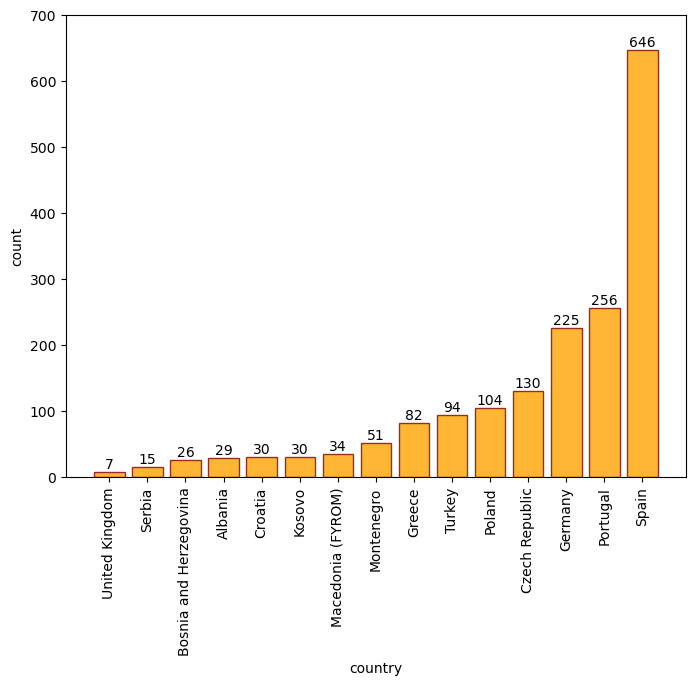

In [45]:
most_cou = df.groupby(df['country'])[['country']].count()
most_cou.columns=["count"] 
most_cou.reset_index(inplace=True)#add index
most_cou = most_cou.sort_values(by='count', ascending=True)
#print(most_cou)

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(most_cou['country'],most_cou['count'],color='orange',edgecolor='maroon',alpha=0.8)
       
plt.xticks(rotation=90)
ax.set_xlabel('country')
ax.set_ylabel('count')
ax.grid(False)
ax.set_ylim(0, 700)

for i, v in enumerate(most_cou['count']):
    ax.text(i, v+1, str(v), ha='center', va='bottom')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

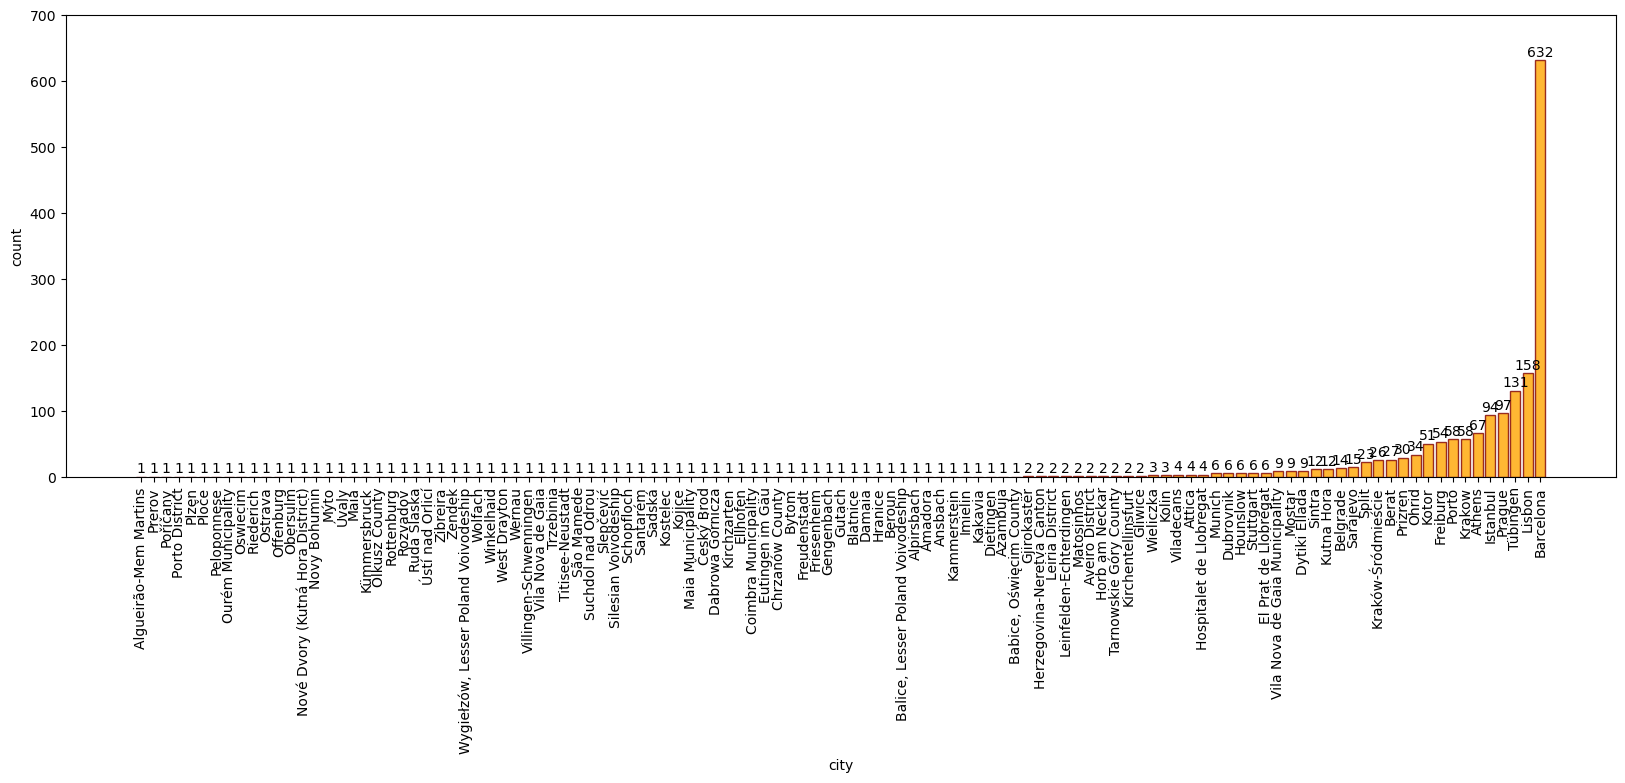

In [54]:
# Q2: Draw the same bar chart, but now for the most visited cities instead of countries
most_city = df.groupby(df['city'])[['city']].count()
most_city.columns=["count"] 
most_city.reset_index(inplace=True)#add index
most_city = most_city.sort_values(by='count', ascending=True)

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(most_city['city'],most_city['count'],color='orange',edgecolor='maroon',alpha=0.8)
       
plt.xticks(rotation=90)
ax.set_xlabel('city')
ax.set_ylabel('count')
ax.grid(False)
ax.set_ylim(0, 700)

for i, v in enumerate(most_city['count']):
    ax.text(i, v+1, str(v), ha='center', va='bottom')

plt.show

## Next: scatter plots as simple maps

<function matplotlib.pyplot.show(close=None, block=None)>

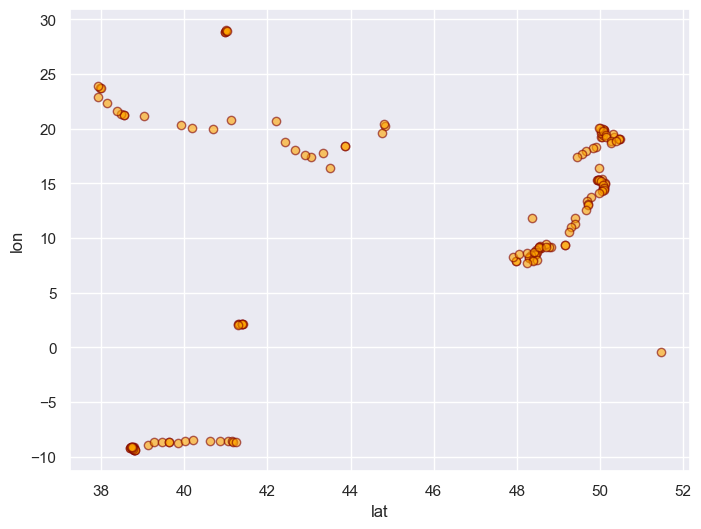

In [97]:
# Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
# You can use the rs dataframe.
# Please style the chart to make it look nicer with good size and alpha settings. 

import seaborn as sns
sns.set(color_codes=True)
sns.set()

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(rs['lat'],rs['lon'],color='orange',edgecolor='maroon',alpha=0.6)
       
ax.set_xlabel('lat')
ax.set_ylabel('lon')
ax.grid(True)

plt.show

## Line charts, with annotation

In [65]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

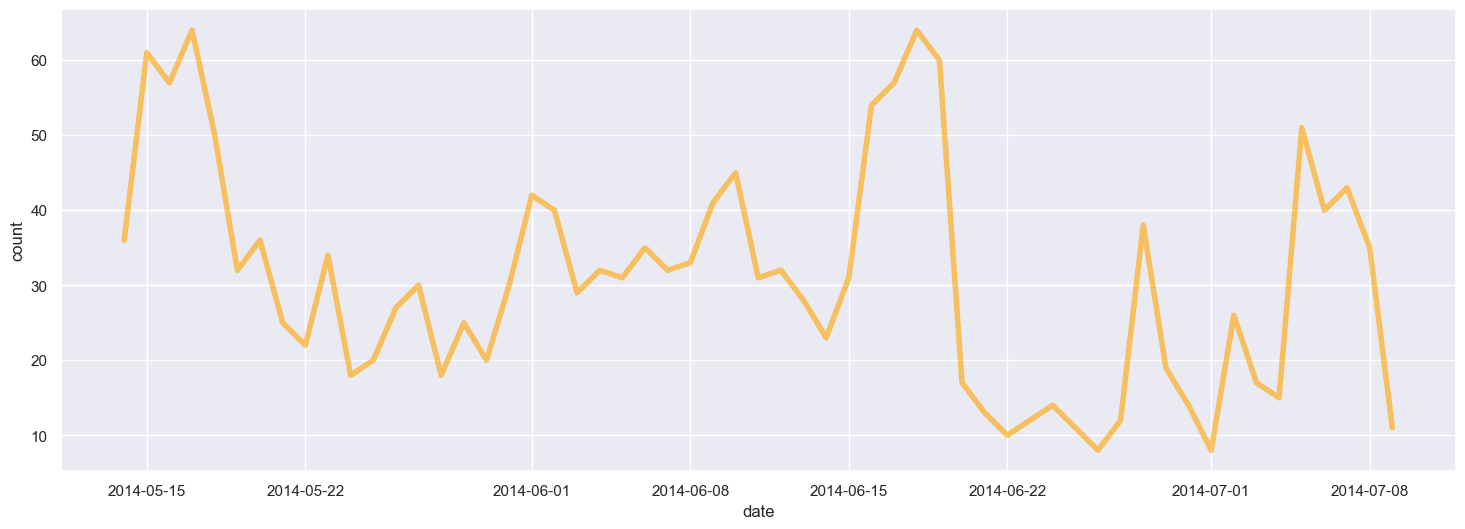

In [111]:
# Q4: Draw a  matplotlib and seaborn line chart from countdata. 
# Please style the chart to make it look nicer with good size and alpha settings. 
import seaborn as sns
df1 = pd.DataFrame(countdata,columns=['count']) #series to dataframe
#no need to add index, cause x = index
fig, ax = plt.subplots(figsize=(18, 6))
sns.lineplot(x=df1.index, y=df1['count'],color='orange',alpha=0.6,linewidth=4)
       
ax.set_xlabel('date')
ax.set_ylabel('count')

plt.show

[datetime.date(2014, 5, 14) datetime.date(2014, 5, 15)
 datetime.date(2014, 5, 16) datetime.date(2014, 5, 17)
 datetime.date(2014, 5, 18) datetime.date(2014, 5, 19)
 datetime.date(2014, 5, 20) datetime.date(2014, 5, 21)
 datetime.date(2014, 5, 22) datetime.date(2014, 5, 23)
 datetime.date(2014, 5, 24) datetime.date(2014, 5, 25)
 datetime.date(2014, 5, 26) datetime.date(2014, 5, 27)
 datetime.date(2014, 5, 28) datetime.date(2014, 5, 29)
 datetime.date(2014, 5, 30) datetime.date(2014, 5, 31)
 datetime.date(2014, 6, 1) datetime.date(2014, 6, 2)
 datetime.date(2014, 6, 3) datetime.date(2014, 6, 4)
 datetime.date(2014, 6, 5) datetime.date(2014, 6, 6)
 datetime.date(2014, 6, 7) datetime.date(2014, 6, 8)
 datetime.date(2014, 6, 9) datetime.date(2014, 6, 10)
 datetime.date(2014, 6, 11) datetime.date(2014, 6, 12)
 datetime.date(2014, 6, 13) datetime.date(2014, 6, 14)
 datetime.date(2014, 6, 15) datetime.date(2014, 6, 16)
 datetime.date(2014, 6, 17) datetime.date(2014, 6, 18)
 datetime.date(2014

TypeError: unsupported operand type(s) for *: 'datetime.date' and 'float'

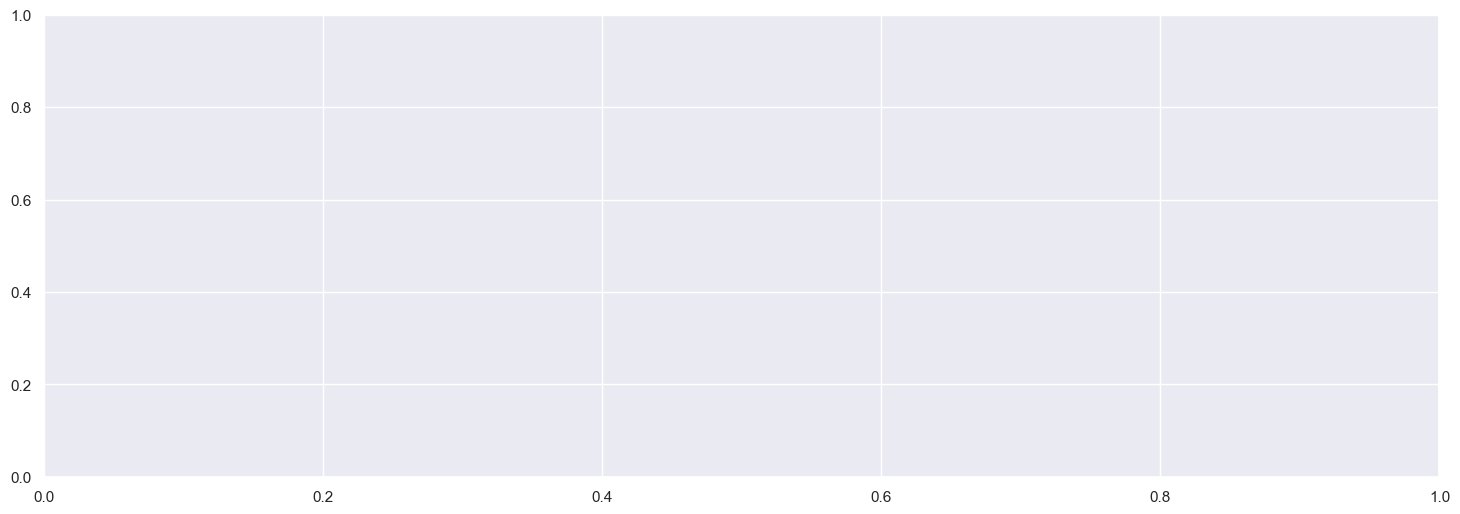

In [155]:
# Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 
# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
# experiment with a more advanced challenge like smoothing the line:
# - https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
# - https://stackoverflow.com/questions/25825946/generating-smooth-line-graph-using-matplotlib

import seaborn as sns
from scipy.interpolate import make_interp_spline

df1 = pd.DataFrame(countdata,columns=['count']) #series to dataframe
#no need to add index, cause x = index
fig, ax = plt.subplots(figsize=(18, 6))

x = df1.index
x = x.tolist()
x = np.array(x)
print(x)
print(min(x))
y = df1['count']
y = y.values
print(type(y))

x_smooth = np.linspace(min(x), max(x), 400)
y_smooth = make_interp_spline(x, y)(x_smooth)

sns.lineplot(x=x_smooth, y=y_smooth,color='green',alpha=0.6,linewidth=2)
# sns.scatterplot(x=df1.index, y=df1['count'], color="gray", size=6)
       
ax.set_xlabel('date')
ax.set_ylabel('count')

plt.show

#had trouble in dealing with the date variable


## Pie charts

In [165]:
cities = df['city'].value_counts()
print(cities.count())
cities.head()
print(type(cities))

113


Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Name: city, dtype: int64

In [14]:
# Q6: draw a pie chart for cities.
# Please style the chart to make it look nicer. 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1884\3250649192.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series([other], index=['Other']))


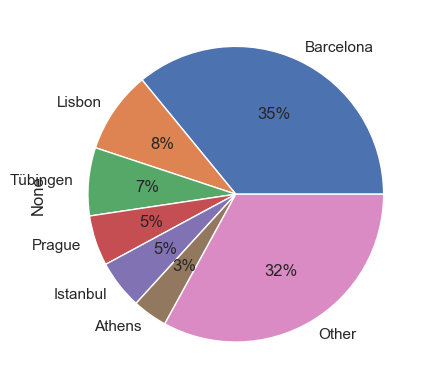

In [190]:
def plot_pie_chart(data, threshold):
    other = data[data < threshold].sum()
    data = data[data >= threshold]
    data = data.append(pd.Series([other], index=['Other']))
    data.plot.pie(autopct='%d%%',legend=False)
    
    plt.legend().set_visible(False)
    plt.show()
    
plot_pie_chart(cities, 60)

#i have no idea how to delete the "none", it seems not be a legend or a label